In [6]:
import numpy as np
import matplotlib.pyplot as plt

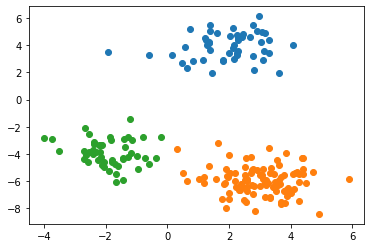

In [11]:
class DataFrame:
    def __init__(self, k, means, number):
        self.k = k
        self.K_means = means
        self.K_nums = number
        self.data = self.creat_data([[1, 0], [0, 1]])
    def creat_data(self, cov):
        data = []
        for k_i in range(self.k):
            for j in range(self.K_nums[k_i]):
                data.append(np.random.multivariate_normal(self.K_means[k_i], cov).tolist())
        return np.array(data)
    def Plot(self): #数据可视化
        lst = 0
        for i in range(self.k):
            plt.scatter(self.data[lst: lst + self.K_nums[i], 0], self.data[lst: lst + self.K_nums[i], 1])
            lst += self.K_nums[i]

k = 3
means = [[2, 4], [3, -6], [-2, -4]] #均值
number = [50, 100, 50] #数量

Data_A = DataFrame(k, means, number)

Data_A.Plot()

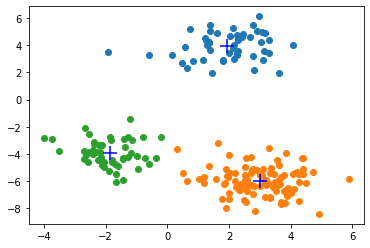

In [96]:
class K_means_method:
    def __init__(self, dataFrame, if_random = True): #if-random = true 随机选择初始点 false 贪心选择初始点
        self.n = sum(dataFrame.K_nums)
        self.k = dataFrame.k
        self.data = dataFrame.data
        self.dataframe = dataFrame
        self.blg = np.zeros(self.n, dtype = np.int64)
        rdn_point = np.random.randint(0, self.n, size = self.k)
        if if_random == True:
            self.center = np.array([self.data[k] for k in rdn_point])
        else:
            self.center = np.array(self.Norandom_select())
    def Norandom_select(self): #选择相距最远的k个点
        select = [self.data[np.random.randint(0, self.n)].tolist()]
        candidate = self.data.tolist()
        candidate.remove(select[0])
        while len(select) < self.k:
            Max_stp = 0
            for pos in candidate:
                stp = 0
                for k in select:
                    stp += (pos[0] - k[0]) ** 2 + (pos[1] - k[1]) ** 2
                if stp > Max_stp:
                    Max_stp = stp
                    cd = pos
            select.append(cd)
            candidate.remove(cd)
        return select
    def Dis(self): #计算data里所有点到center的距离
        for i in range(self.k):
            x = self.data - self.center[i]
            x = x ** 2
            if i == 0:
                Dis = x.sum(axis = 1, keepdims = True)
            else:
                Dis = np.append(Dis, x.sum(axis = 1, keepdims = True), axis = 1)
        return Dis
    def K_means(self):
        Point_dis = self.Dis()
        for i in range(self.n):
            self.blg[i] = np.argmin(Point_dis[i]) #找到离得最近的center并为其归类
        self.change_center()
    def change_center(self): #计算均值，更新center
        K_point = [[] for i in range(self.k)]
        for i in range(self.n):
            K_point[self.blg[i]].append(i)
        for i in range(self.k):
            k0, k1 = 0, 0
            for k in K_point[i]:
                k0 += self.data[k][0]
                k1 += self.data[k][1]
            self.center[i][0] = k0 / len(K_point[i])
            self.center[i][1] = k1 / len(K_point[i])
    def Solve(self, Epoch): #多次迭代
        for e in range(Epoch):
            self.K_means()
        self.dataframe.Plot()
        for i in range(self.k):
            plt.scatter(self.center[i][0], self.center[i][1], marker = '+', c = 'b', s =200)
            
s1 = K_means_method(Data_A, False)
s1.Solve(10) #设置迭代次数